<div class="alert alert-block alert-info">
RONDA --START -- IMPORT CODE AND DATA CLEANUP
</div>

In [1]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
import numpy as np
import scipy.stats as stats
from pathlib import Path
import requests
import time
from pprint import pprint

In [2]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = Path('data/merged_data_cleaned.csv')
coffee_df = pd.read_csv(csv_path, encoding="utf8")
coffee_df["Country.of.Origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [3]:
coffee_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [4]:
coffee_df_new = coffee_df.rename(columns={'Total.Cup.Points': 'CoffeeScore',
                                            'Country.of.Origin': 'Country_of_Origin',
                                         'Processing.Method': 'Processing_Method'})

## Data Cleaning
(RONDA)

In [5]:
# delete unnecessary columnS
del coffee_df_new['Lot.Number']
del coffee_df_new['Mill']
del coffee_df_new['ICO.Number']
del coffee_df_new['Company']
del coffee_df_new['Producer']
del coffee_df_new['In.Country.Partner']
del coffee_df_new['Certification.Body']
del coffee_df_new['Certification.Address']
del coffee_df_new['Certification.Contact']
del coffee_df_new['Owner.1']
del coffee_df_new['Expiration']

coffee_df_new.head()


,Unnamed: 0,Species,Owner,Country_of_Origin,Farm.Name,Altitude,Region,Number.of.Bags,Bag.Weight,Harvest.Year,...,CoffeeScore,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,1950-2200,guji-hambela,300,60 kg,2014,...,90.58,0.12,0,0.0,Green,0,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,1950-2200,guji-hambela,300,60 kg,2014,...,89.92,0.12,0,0.0,Green,1,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",1600 - 1800 m,NaN,5,1,NaN,...,89.75,0.00,0,0.0,NaN,0,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,1800-2200,oromia,320,60 kg,2014,...,89.00,0.11,0,0.0,Green,2,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,1950-2200,guji-hambela,300,60 kg,2014,...,88.83,0.12,0,0.0,Green,2,m,1950.0,2200.0,2075.0


In [6]:
# Clean Country of Origin
coffee_df_new['Country_of_Origin'] = coffee_df_new['Country_of_Origin'].replace(['United States (Hawaii)'],
                                                                                'United States (HI)').replace(['United States (Puerto Rico)'],
                                                                                                              'United States (PR)').replace(['Tanzania, United Republic Of'], 'Tanzania')

# Clean Region
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['campos altos - cerrado',
                                                           'carmo de minas', 'high mogiana',
                                                           'mantiqueira de minas', 'minas gerais, br',
                                                           'mogiana', 'monte carmelo', 'mountains of minas gerais'],
                                                          'Minas Gerais').replace(['south of minas', 'sul de minas',
                                                                                   'sul de minas - carmo de minas'],
                                                                                  'Sul de Minas').replace(['alta paulista (sao paulo)'],
                                                                                                          'Alta Paulista').replace(['brazil matas de minas'],
                                                                                                                                   'matas de minas').replace(['cerrado - monte carmelo - minas gerais',
                                                                                                                                   'chapadÃ£o de ferro (cerrado mineiro)'],
                                                                                                                                   'cerrado').replace(['vale da grama'], 'grama valley')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['52 narino (exact location: mattituy; municipal region: florida code 381',
                                                           'nariÃ±o'], 'Narino').replace(['huila supremo', 'south huila'], 'huila')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['valle central'], 'central valley').replace(['west and central valley'], 'west valley')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['ataco, apaneca - ilamatepec mountain range',
                                                           'department of ahuachapan, municipality of apanecallamatepec mountain'],
                                                           'apaneca').replace(['el balsamo, quezaltepec'], 'Chalatenango')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['province of manabi, ecuador'], 'Manabi').replace(['san juan, playas'], 'San Juan')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['blida,kercha,guji,oromia',
                                                           'guji-hambela'], 'Guji').replace(['kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.'],
                                                                                            'Keffa Zone').replace(['gedio',
                                                                                                                   'snnp/kaffa zone,gimbowereda',
                                                                                                                   'snnprg; kafa; telo woreda; shada kebele'], 'SNNPR').replace(['ethiopia, sidamo',
                                                                                                                   'sidamo'], 'Sidama').replace(['kelem welega', 'limu', 'oromiya'],
                                                                                                                                                'oromia').replace(['aricha'], 'yirgacheffe')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['chuva, san marcos', 
                                                           'el tumbador, san marcos',
                                                           'la reforma, san marcos'],
                                                          'san marcos').replace(['nuevo oriente', 'orient', 'oriente'],
                                                                                 'santa rosa').replace(['san lucas toliman, solola'],
                                                                                                       'solola').replace(['aldea xeucalvitz, ixil region, quiche department'],
                                                                                                                         'Quiche').replace(['sacatepequez, guatemala'],
                                                                                                                                           'Sacatepequez')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(["department d'artibonite , haiti"],
                                                           'Artibonite').replace(['dondon, haiti'],
                                                                                 'Dondon').replace(['thiotte, haiti'], 'Thiotte')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['central region',
                                                           'comayagua, honduras', 'siguatepeque, comayagua'],
                                                          'comayagua').replace(['el paraÃso',
                                                                                'guinope el paraÃso'], 'El Paraiso').replace(['marcala'],
                                                                                                                              'La Paz').replace(['san marcos'], 'ocotepeque')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['chickmangalore', 'chikmagalur karnataka',
                                                           'chikmagalur karnataka india', 'chikmagalur karnataka indua'],
                                                          'chikmagalur') 
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['aceh gayo',
                                                           'aceh tengah'], 'aceh').replace(['lington nihuta',
                                                                                            'lintong', 'sumatra brastagi'],
                                                                                           'Sumatra').replace(['central kenya'],
                                                                                                              'Central').replace(['temanggung, indonesia'],
                                                                                                                                 'Central Java')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['lao p.d.r.'],
                                                          'Bolaven Plateau').replace(['paksong,laos'],
                                                                                     'Paksong').replace(['chamarel (south west)'],
                                                                                                        'Chamarel')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['los angeles'],
                                                          'Baja').replace(['amatenango de la frontera',
                                                                           'chiapas, jaltenango', 'chilÃ³n',
                                                                           'escuitla', 'jaltenango', 'la concordia',
                                                                           'la concordia, chiapas', 'motozintla',
                                                                           'motozintla, chiapas', 'ocosingo',
                                                                           'sacÃºn palma, municipio de chilÃ³n, chiapas',
                                                                           'san pedro cotzilnam', 'santa maria sitepec',
                                                                           'sierra fraylesca, chiapas', 'sierra norte yajalon, chiapas',
                                                                           'sierra, chiapas', 'siltepec el triunfo',
                                                                           'siltepec el triunfo, chiapas, mexico', 'tapachula',
                                                                           'tuxtla gutierrez', 'yajalon'],
                                                                          'chiapas').replace(['canoas', 'cofradia de suchitlan',
                                                                                              'el remudadero', 'la cumbre', 'manzanillo'], 'colima').replace(['cuarenteÃ±o'],
                                                                                              'El Cuarenteno').replace(['atoyac de alvarez', 'iliatenco, guerrero',
                                                                                                                        'zihuatanejo de azueta'],
                                                                                                                       'Guerrero').replace(['calnali, hidalgo',
                                                                                                                                            'chapulhuacan, hidalgo',
                                                                                                                                            'huazalingo, hidalgo', 'jaltocan, hidalgo',
                                                                                                                                            'san bartolo tutotepec', 'tenango de doria, hidalgo',
                                                                                                                                            'tlanchinol, hidalgo'], 'Hidalgo') 
                                                           
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['el desmoronado, talpan de allende jalisco',
                                                           'talpa de allende'], 'Jalisco').replace(['santo reyes nopala'],
                                                                                                   'juquila').replace(['adolfo lopez mateos',
                                                                                                                       'tepetzingo'], 'mexico').replace(['ohuapan, tlaltetela'],
                                                                                                                       'Michoacan').replace(['la yerba', 'la yerbabuena'],
                                                                                                                                            'nayarit')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['huautla de jimenez', 'pluma hidalogo, oaxaca',
                                                           'san miguel del puerto', 'santa catarina juquila',
                                                           'santo domingo cacalotepec', 'sierra alta mixe y zapoteca',
                                                           'temaxcalapa', 'villa talea de castro', 'xochitonalco, huautla',
                                                           'zaragoza itundujia'], 'oaxaca').replace(['tlacuilotepec', 'tlatlauquitepec',
                                                                                                     'xicotepec de juarez',
                                                                                                     'zapotitlan de mendez'], 'Puebla').replace(['san fernando'], 'Tamaulipas')  
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['altotonga', 'chocaman, veracruz', 'coatepec', 'coatepec, coatepec',
                                                           'coscomatepec', 'fortÃn de las flores', 'hustusco', 'ixhuatlan del cafe',
                                                           'juchique de ferrer', 'mahuixtlan', 'progreso santa rosa teocelo', 'tepictla',
                                                           'totutla', 'xalapa', 'yecuatla', 'zentla'], 'Veracruz')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['doe kwin, pyin oo lwin', 'pyin oo lwin'],
                                                          'pyinoolwin').replace(['yauk sauk, shan state'],
                                                                                'South Shan State').replace(['ywar ngan township'],
                                                                                                            'ywar ngan').replace(['dipilto, nueva segovia'],
                                                                                                                                 'nueva segovia')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['chiayi alishan å˜‰ç¾©ç¸£é˜¿é‡Œå±±é„‰',
                                                           'chiayi fanluå˜‰ç¾©ç¸£ç•ªè·¯é„‰',
                                                           'leye, alishan township, chiayi county',
                                                           'leye, alishan township, chiayi county å˜‰ç¾©é˜¿é‡Œå±±æ¨‚é‡Žæ‘'],
                                                          'Chiayi').replace(['changhua baguashan å½°åŒ–å¸‚å…«å¦å±±'],
                                                                            'Changhua').replace(['yunlin é›²æž—ç¸£çŸ³å£',
                                                                                                 'yunlin gukeng he bao é›²æž—ç¸£å¤å‘é„‰è·è‹žæ‘'],
                                                                                                'Gukeng Township').replace(['åœ‹å§“é„‰ guoshing township'],\
                                                                                                                           'Guoshing Township').replace(['natou county'],
                                                                                                                           'nantou')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['taichung taiping å°ä¸å¸‚å¤ªå¹³å€',
                                                           'taichung xinshe å°ä¸­å¸‚æ–°ç¤¾å€'],
                                                          'Taichung').replace(['å°å—å¸‚æ±å±±å€ (dongshan dist., tainan city)',
                                                                               'å°å—å¸‚æ±å±±å€( dongshan dist., tainan city)',
                                                                               'baihe dist., tainan city è‡ºå—å¸‚ç™½æ²³å€',
                                                                               'dongshan dist., tainan city å°å—å¸‚æ±å±±å€',
                                                                               'dongshan dist., tainan city è‡ºå—å¸‚æ±å±±å€',
                                                                               'nanxi dist., tainan city è‡ºå—å¸‚æ¥ è¥¿å€'],
                                                                              'Tainan City').replace(['å˜‰ç¾©é˜¿é‡Œå±±', 'å¤å‘é„‰è·åŒ…æ‘å°–å±±å‘60è™Ÿ',
                                                                                                      'å°ä¸­å’Œå¹³å€', 'å°ä¸­æ–°ç¤¾', 'å°æ±å¤ªéº»é‡Œ', 'å°ç£',
                                                                                                      'å—æŠ•åœ‹å§“', 'è‹—æ —ä¸‰ç£', 'è‹—æ —æ³°å®‰',
                                                                                                      'taiwu township , pingtung county å±æ±ç¸£æ³°æ­¦é„‰'], 'Taiwu Township')
                                                           
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['arusha meru'], 'arusha').replace(['luwero central region'],
                                                                                             'central').replace(['chiang rai thailand',
                                                                                                                 'chiangrai', 'doi chaang village, chiang rai, thialand',
                                                                                                                 'thailand'], 'chiang rai').replace(['bulambuli eastern region',
                                                                                                                                                     'eastern uganda',
                                                                                                                                                     'iganga namadrope eastern'],
                                                                                                                                                    'eastern').replace(['kapchorwa eastern'], 'kapchorwa')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['karatu arusha',
                                                           'karatu ngorogoro', 'karatu northern',
                                                           'manyara, karatu'], 'Karatu').replace(['kasese, mt. rwenzori'],
                                                                                                 'kasese').replace(['iwala village, mbeya rural'],
                                                                                                                   'mbeya').replace(['sipi, mt elgon'],
                                                                                                                                    'mt elgon').replace(['ruvuma, mbinga'],
                                                                                                                                    'ruvuma').replace(['sheema south western'],
                                                                                                                                                      'south western')
                                                           
coffee_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1339 non-null   int64  
 1   Species               1339 non-null   object 
 2   Owner                 1332 non-null   object 
 3   Country_of_Origin     1338 non-null   object 
 4   Farm.Name             980 non-null    object 
 5   Altitude              1113 non-null   object 
 6   Region                1280 non-null   object 
 7   Number.of.Bags        1339 non-null   int64  
 8   Bag.Weight            1339 non-null   object 
 9   Harvest.Year          1292 non-null   object 
 10  Grading.Date          1339 non-null   object 
 11  Variety               1113 non-null   object 
 12  Processing_Method     1169 non-null   object 
 13  Aroma                 1339 non-null   float64
 14  Flavor                1339 non-null   float64
 15  Aftertaste           

In [7]:
# Delete all rows with United States as country due to invalid Region
coffee_df_new = coffee_df_new[coffee_df_new["Country_of_Origin"] != "United States"]

# Delete all rows with blank values in BOTH processing method and altitude
coffee_df_new = coffee_df_new.dropna(subset=["Processing_Method", "Altitude"], how="all")

# Delete [4] rows with anomalous values in place of data
coffee_df_new = coffee_df_new[coffee_df_new["Altitude"] != "mmm"]
coffee_df_new = coffee_df_new[coffee_df_new["Altitude"] != "test"]
coffee_df_new = coffee_df_new[coffee_df_new["Altitude"] != "huanuco"]
coffee_df_new = coffee_df_new[coffee_df_new["Altitude"] != "-1"]

coffee_df_new.to_csv("Coffee_exp.csv", index=False)

In [8]:
# Clean Country of Origin
coffee_df_new['Country_of_Origin'] = coffee_df_new['Country_of_Origin'].replace(['United States (Hawaii)'],
                                                                                'United States (HI)').replace(['United States (Puerto Rico)'],
                                                                                                              'United States (PR)').replace(['Tanzania, United Republic Of'], 'Tanzania')

# Clean Region
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['campos altos - cerrado',
                                                           'carmo de minas', 'high mogiana',
                                                           'mantiqueira de minas', 'minas gerais, br',
                                                           'mogiana', 'monte carmelo', 'mountains of minas gerais'],
                                                          'Minas Gerais').replace(['south of minas', 'sul de minas',
                                                                                   'sul de minas - carmo de minas'],
                                                                                  'Sul de Minas').replace(['alta paulista (sao paulo)'],
                                                                                                          'Alta Paulista').replace(['brazil matas de minas'],
                                                                                                                                   'matas de minas').replace(['cerrado - monte carmelo - minas gerais',
                                                                                                                                   'chapadÃ£o de ferro (cerrado mineiro)'],
                                                                                                                                   'cerrado').replace(['vale da grama'], 'grama valley')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['52 narino (exact location: mattituy; municipal region: florida code 381',
                                                           'nariÃ±o'], 'Narino').replace(['huila supremo', 'south huila'], 'huila')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['valle central'], 'central valley').replace(['west and central valley'], 'west valley')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['ataco, apaneca - ilamatepec mountain range',
                                                           'department of ahuachapan, municipality of apanecallamatepec mountain'],
                                                           'apaneca').replace(['el balsamo, quezaltepec'], 'Chalatenango')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['province of manabi, ecuador'], 'Manabi').replace(['san juan, playas'], 'San Juan')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['blida,kercha,guji,oromia',
                                                           'guji-hambela'], 'Guji').replace(['kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.'],
                                                                                            'Keffa Zone').replace(['gedio',
                                                                                                                   'snnp/kaffa zone,gimbowereda',
                                                                                                                   'snnprg; kafa; telo woreda; shada kebele'], 'SNNPR').replace(['ethiopia, sidamo',
                                                                                                                   'sidamo'], 'Sidama').replace(['kelem welega', 'limu', 'oromiya'],
                                                                                                                                                'oromia').replace(['aricha'], 'yirgacheffe')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(['chuva, san marcos', 
                                                           'el tumbador, san marcos',
                                                           'la reforma, san marcos'],
                                                          'san marcos').replace(['nuevo oriente', 'orient', 'oriente'],
                                                                                 'santa rosa').replace(['san lucas toliman, solola'],
                                                                                                       'solola').replace(['aldea xeucalvitz, ixil region, quiche department'],
                                                                                                                         'Quiche').replace(['sacatepequez, guatemala'],
                                                                                                                                           'Sacatepequez')

coffee_df_new['Region'] = coffee_df_new['Region'].replace(["department d'artibonite , haiti"],
                                                           'Artibonite').replace(['dondon, haiti'],
                                                                                 'Dondon').replace(['thiotte, haiti'], 'Thiotte')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['central region',
                                                           'comayagua, honduras', 'siguatepeque, comayagua'],
                                                          'comayagua').replace(['el paraÃso',
                                                                                'guinope el paraÃso'], 'El Paraiso').replace(['marcala'],
                                                                                                                              'La Paz').replace(['san marcos'], 'ocotepeque')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['chickmangalore', 'chikmagalur karnataka',
                                                           'chikmagalur karnataka india', 'chikmagalur karnataka indua'],
                                                          'chikmagalur') 
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['aceh gayo',
                                                           'aceh tengah'], 'aceh').replace(['lington nihuta',
                                                                                            'lintong', 'sumatra brastagi'],
                                                                                           'Sumatra').replace(['central kenya'],
                                                                                                              'Central').replace(['temanggung, indonesia'],
                                                                                                                                 'Central Java')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['lao p.d.r.'],
                                                          'Bolaven Plateau').replace(['paksong,laos'],
                                                                                     'Paksong').replace(['chamarel (south west)'],
                                                                                                        'Chamarel')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['los angeles'],
                                                          'Baja').replace(['amatenango de la frontera',
                                                                           'chiapas, jaltenango', 'chilÃ³n',
                                                                           'escuitla', 'jaltenango', 'la concordia',
                                                                           'la concordia, chiapas', 'motozintla',
                                                                           'motozintla, chiapas', 'ocosingo',
                                                                           'sacÃºn palma, municipio de chilÃ³n, chiapas',
                                                                           'san pedro cotzilnam', 'santa maria sitepec',
                                                                           'sierra fraylesca, chiapas', 'sierra norte yajalon, chiapas',
                                                                           'sierra, chiapas', 'siltepec el triunfo',
                                                                           'siltepec el triunfo, chiapas, mexico', 'tapachula',
                                                                           'tuxtla gutierrez', 'yajalon'],
                                                                          'chiapas').replace(['canoas', 'cofradia de suchitlan',
                                                                                              'el remudadero', 'la cumbre', 'manzanillo'], 'colima').replace(['cuarenteÃ±o'],
                                                                                              'El Cuarenteno').replace(['atoyac de alvarez', 'iliatenco, guerrero',
                                                                                                                        'zihuatanejo de azueta'],
                                                                                                                       'Guerrero').replace(['calnali, hidalgo',
                                                                                                                                            'chapulhuacan, hidalgo',
                                                                                                                                            'huazalingo, hidalgo', 'jaltocan, hidalgo',
                                                                                                                                            'san bartolo tutotepec', 'tenango de doria, hidalgo',
                                                                                                                                            'tlanchinol, hidalgo'], 'Hidalgo') 
                                                           
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['el desmoronado, talpan de allende jalisco',
                                                           'talpa de allende'], 'Jalisco').replace(['santo reyes nopala'],
                                                                                                   'juquila').replace(['adolfo lopez mateos',
                                                                                                                       'tepetzingo'], 'mexico').replace(['ohuapan, tlaltetela'],
                                                                                                                       'Michoacan').replace(['la yerba', 'la yerbabuena'],
                                                                                                                                            'nayarit')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['huautla de jimenez', 'pluma hidalogo, oaxaca',
                                                           'san miguel del puerto', 'santa catarina juquila',
                                                           'santo domingo cacalotepec', 'sierra alta mixe y zapoteca',
                                                           'temaxcalapa', 'villa talea de castro', 'xochitonalco, huautla',
                                                           'zaragoza itundujia'], 'oaxaca').replace(['tlacuilotepec', 'tlatlauquitepec',
                                                                                                     'xicotepec de juarez',
                                                                                                     'zapotitlan de mendez'], 'Puebla').replace(['san fernando'], 'Tamaulipas')  
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['altotonga', 'chocaman, veracruz', 'coatepec', 'coatepec, coatepec',
                                                           'coscomatepec', 'fortÃ-n de las flores', 'hustusco', 'ixhuatlan del cafe',
                                                           'juchique de ferrer', 'mahuixtlan', 'progreso santa rosa teocelo', 'tepictla',
                                                           'totutla', 'xalapa', 'yecuatla', 'zentla'], 'Veracruz')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['doe kwin, pyin oo lwin', 'pyin oo lwin'],
                                                          'pyinoolwin').replace(['yauk sauk, shan state'],
                                                                                'South Shan State').replace(['ywar ngan township'],
                                                                                                            'ywar ngan').replace(['dipilto, nueva segovia'],
                                                                                                                                 'nueva segovia')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['chiayi alishan å˜‰ç¾©ç¸£é˜¿é‡Œå±±é„‰',
                                                           'chiayi fanluå˜‰ç¾©ç¸£ç•ªè·¯é„‰',
                                                           'leye, alishan township, chiayi county',
                                                           'leye, alishan township, chiayi county å˜‰ç¾©é˜¿é‡Œå±±æ¨‚é‡Žæ‘'],
                                                          'Chiayi').replace(['changhua baguashan å½°åŒ–å¸‚å…«å¦å±±'],
                                                                            'Changhua').replace(['yunlin é›²æž—ç¸£çŸ³å£',
                                                                                                 'yunlin gukeng he bao é›²æž—ç¸£å¤å‘é„‰è·è‹žæ‘'],
                                                                                                'Gukeng Township').replace(['åœ‹å§“é„‰ guoshing township'],\
                                                                                                                           'Guoshing Township').replace(['natou county'],
                                                                                                                           'nantou')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['taichung taiping å°ä¸­å¸‚å¤ªå¹³å€',
                                                           'taichung xinshe å°ä¸­å¸‚æ–°ç¤¾å€'],
                                                          'Taichung').replace(['å°å—å¸‚æ±å±±å€ (dongshan dist., tainan city)',
                                                                               'å°å—å¸‚æ±å±±å€( dongshan dist., tainan city)',
                                                                               'baihe dist., tainan city è‡ºå—å¸‚ç™½æ²³å€',
                                                                               'dongshan dist., tainan city å°å—å¸‚æ±å±±å€',
                                                                               'dongshan dist., tainan city è‡ºå—å¸‚æ±å±±å€',
                                                                               'nanxi dist., tainan city è‡ºå—å¸‚æ¥ è¥¿å€'],
                                                                              'Tainan City').replace(['å˜‰ç¾©é˜¿é‡Œå±±', 'å¤å‘é„‰è·åŒ…æ‘å°–å±±å‘60è™Ÿ',
                                                                                                      'å°ä¸­å’Œå¹³å€', 'å°ä¸­æ–°ç¤¾', 'å°æ±å¤ªéº»é‡Œ	å°ç£',
                                                                                                      'å—æŠ•åœ‹å§“', 'è‹—æ —ä¸‰ç£', 'è‹—æ —æ³°å®‰',
                                                                                                      'taiwu township , pingtung county å±æ±ç¸£æ³°æ­¦é„‰'], 'Taiwu Township')
                                                           
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['arusha meru'], 'arusha').replace(['luwero central region'],
                                                                                             'central').replace(['chiang rai thailand',
                                                                                                                 'chiangrai', 'doi chaang village, chiang rai, thialand',
                                                                                                                 'thailand'], 'chiang rai').replace(['bulambuli eastern region',
                                                                                                                                                     'eastern uganda',
                                                                                                                                                     'iganga namadrope eastern'],
                                                                                                                                                    'eastern').replace(['kapchorwa eastern'], 'kapchorwa')
                                                           
coffee_df_new['Region'] = coffee_df_new['Region'].replace(['karatu arusha',
                                                           'karatu ngorogoro', 'karatu northern',
                                                           'manyara, karatu'], 'Karatu').replace(['kasese, mt. rwenzori'],
                                                                                                 'kasese').replace(['iwala village, mbeya rural'],
                                                                                                                   'mbeya').replace(['sipi, mt elgon'],
                                                                                                                                    'mt elgon').replace(['ruvuma, mbinga'],
                                                                                                                                    'ruvuma').replace(['sheema south western'],
                                                                                                                                                      'south western')
                                                           
coffee_df_new.head(20)

,Unnamed: 0,Species,Owner,Country_of_Origin,Farm.Name,Altitude,Region,Number.of.Bags,Bag.Weight,Harvest.Year,...,CoffeeScore,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,1950-2200,Guji,300,60 kg,2014,...,90.58,0.12,0,0.0,Green,0,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,1950-2200,Guji,300,60 kg,2014,...,89.92,0.12,0,0.0,Green,1,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",1600 - 1800 m,NaN,5,1,NaN,...,89.75,0.00,0,0.0,NaN,0,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,1800-2200,oromia,320,60 kg,2014,...,89.00,0.11,0,0.0,Green,2,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,1950-2200,Guji,300,60 kg,2014,...,88.83,0.12,0,0.0,Green,2,m,1950.0,2200.0,2075.0
5,5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,100,30 kg,2013,...,88.83,0.11,0,0.0,Bluish-Green,1,m,NaN,NaN,NaN
6,6,Arabica,hugo valdivia,Peru,NaN,NaN,NaN,100,69 kg,2012,...,88.75,0.11,0,0.0,Bluish-Green,0,m,NaN,NaN,NaN
7,7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,1570-1700,oromia,300,60 kg,March 2010,...,88.67,0.03,0,0.0,NaN,0,m,1570.0,1700.0,1635.0
8,8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,1570-1700,oromia,300,60 kg,March 2010,...,88.42,0.03,0,0.0,NaN,0,m,1570.0,1700.0,1635.0
9,9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,1795-1850,SNNPR,50,60 kg,2014,...,88.25,0.10,0,0.0,Green,4,m,1795.0,1850.0,1822.5


In [9]:
# delete unnecessary columnS
# del coffee_df_new['Lot.Number']
# del coffee_df_new['Mill']
# del coffee_df_new['ICO.Number']
# del coffee_df_new['Company']
# del coffee_df_new['Producer']
# del coffee_df_new['In.Country.Partner']
# del coffee_df_new['Certification.Body']
# del coffee_df_new['Certification.Address']
# del coffee_df_new['Certification.Contact']
# del coffee_df_new['Owner.1']

#coffee_df_new.head(20)
coffee_df_new.to_csv("Coffee_exp.csv", index=False)

<div class="alert alert-block alert-info">
RONDA --END -- IMPORT CODE AND DATA CLEANUP
</div>

<div class="alert alert-block alert-info">
TAYLOR -- START -- GENERAL EDA -- STATISTICS by SPECIES
</div>

In [10]:
#Look at key metrics by species
#Coffee Score by Species
species_group = coffee_df_new.groupby('Species')
coffee_score_species_metrics = species_group.agg({"CoffeeScore": ["mean", "median", "var", "std", "sem"]})
coffee_score_species_metrics

CoffeeScore                                      
               mean median        var       std       sem
Species                                                  
Arabica   82.051018  82.50  12.713917  3.565658  0.101751
Robusta   81.163200  81.58   5.758523  2.399692  0.479938

In [11]:
#Flavor by Species
flavor_species_metrics = species_group.agg({"Flavor": ["mean", "median", "var", "std", "sem"]})
flavor_species_metrics

Flavor                                     
             mean median       var       std       sem
Species                                               
Arabica  7.509324   7.50  0.159293  0.399115  0.011389
Robusta  7.650000   7.75  0.098758  0.314258  0.062852

In [12]:
#Aroma by Species
aroma_species_metrics = species_group.agg({"Aroma": ["mean", "median", "var", "std", "sem"]})
aroma_species_metrics

Aroma                                     
             mean median       var       std       sem
Species                                               
Arabica  7.559593   7.58  0.146058  0.382175  0.010906
Robusta  7.706800   7.67  0.090806  0.301340  0.060268

In [13]:
#Aftertaste by Species
aftertaste_species_metrics = species_group.agg({"Aftertaste": ["mean", "median", "var", "std", "sem"]})
aftertaste_species_metrics

Aftertaste                                     
              mean median       var       std       sem
Species                                                
Arabica   7.386645   7.42  0.162784  0.403464  0.011513
Robusta   7.590000   7.75  0.121650  0.348784  0.069757

In [14]:
#Look at key metrics by processing method
processing_method_group = coffee_df_new.groupby('Processing_Method')
coffee_score_pm_metrics = processing_method_group.agg({'CoffeeScore': ["mean", "median", "var", "std", "sem"]})
coffee_score_pm_metrics

CoffeeScore                                       
                                 mean  median        var       std       sem
Processing_Method                                                           
Natural / Dry               82.280941  82.750   7.956970  2.820810  0.176646
Other                       81.216400  81.830  16.548207  4.067949  0.813590
Pulped natural / honey      82.807857  82.665   2.846787  1.687243  0.450935
Semi-washed / Semi-pulped   82.633571  82.500   3.121245  1.766705  0.236086
Washed / Wet                81.923705  82.420   7.026594  2.650772  0.093312

In [15]:
# Generate a bar graph of coffee scores by processing method
# plt.bar(processing_method_group['Processing_Method'], processing_method_group['CoffeeScore'])
# plt.xlabel("Processing_Method")
# plt.ylabel("CoffeeScore")
# plt.show()

In [16]:
#GroupBy Species and Country of Origin
#Count coffees by country for each species
species_by_country = coffee_df_new.groupby(['Species'])['Country_of_Origin'].value_counts()
species_by_country

#Look at percentage of coffees by country
#count_of_species = coffee_df_new['Species'].value_counts()
#count_of_species
#species_percent_by_country = species_by_country / count_of_species 
#species_percent_by_country

Species  Country_of_Origin 
Arabica  Mexico                236
         Guatemala             178
         Colombia              173
         Brazil                125
         Taiwan                 72
         Honduras               53
         Costa Rica             51
         United States (HI)     51
         Tanzania               40
         Ethiopia               34
         Uganda                 26
         Kenya                  23
         Thailand               23
         El Salvador            21
         Nicaragua              21
         Indonesia              20
         China                  16
         Malawi                 11
         Myanmar                 8
         Peru                    7
         Vietnam                 7
         Haiti                   6
         Philippines             5
         Panama                  4
         United States (PR)      4
         Laos                    3
         Burundi                 2
         Cote d?Ivoire     

<div class="alert alert-block alert-info">
TAYLOR -- END -- GENERAL EDA -- STATISTICS by SPECIES
</div>

<div class="alert alert-block alert-info">
SNEHA -- START -- BOXPLOTS by SPECIES/ANY FUNCTION
</div>

In [17]:
coffee_df_new.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country_of_Origin', 'Farm.Name',
       'Altitude', 'Region', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Variety', 'Processing_Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup',
       'Sweetness', 'Cupper.Points', 'CoffeeScore', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

Arabica's Aroma:
Potential outliers are :[8.67, 8.75, 8.42, 8.25, 8.58, 8.42, 8.25, 8.67, 8.33, 8.25, 8.33, 8.42, 8.42, 8.5, 8.42, 8.42, 8.5, 8.42, 8.33, 8.25, 8.33, 8.33, 8.33, 8.25, 8.42, 8.5, 8.42, 5.08, 8.25, 6.92, 6.83, 6.92, 6.92, 6.83, 6.92, 6.92, 6.92, 6.92, 6.75, 6.75, 6.92, 6.83, 6.83, 6.83, 6.92, 6.83, 6.83, 6.67, 6.42, 6.17, 6.83, 6.83, 6.67, 6.75, 6.75, 6.5, 6.92, 6.92, 6.92, 6.33, 6.92, 6.5, 6.92, 6.67, 6.75, 0.0] 
Interquartile Range is :0.33

 
Robusta's Aroma:
Potential outliers are :[6.75] 
Interquartile Range is :0.34

 
Arabica's Flavor:
Potential outliers are :[8.83, 8.67, 8.5, 8.58, 8.5, 8.42, 8.5, 8.67, 8.58, 8.67, 8.42, 8.5, 8.42, 6.67, 6.5, 6.5, 6.08, 6.17, 6.33, 6.5, 6.58, 6.5, 6.5, 6.5, 6.5, 6.67, 6.33, 6.58, 6.42, 6.5, 6.67, 6.5, 6.17, 6.33, 6.58, 6.58, 6.67, 0.0] 
Interquartile Range is :0.42

 
Robusta's Flavor:
Potential outliers are :[6.83, 6.67] 
Interquartile Range is :0.25

 
Arabica's Aftertaste:
Potential outliers are :[8.67, 8.5, 8.42, 8.42, 8.25, 

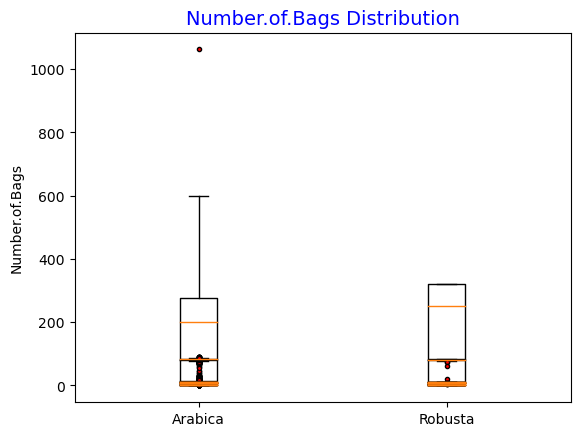

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
species = ["Arabica", "Robusta"]
metrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'CoffeeScore', 'Moisture', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']
metric_value = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for j,m in enumerate(metrics):
    for i,sp in enumerate(species):
        metric_value.append(coffee_df_new.loc[(coffee_df["Species"]==sp),m])
        percentiles = metric_value[i].quantile([0.25,0.5,0.75])
        upperq = percentiles[0.75]
        lowerq = percentiles[0.25]
        IQR = upperq-lowerq
        upper_lim = upperq+(1.5*IQR)
        lower_lim = lowerq-(1.5*IQR)
        outliers = [tv for tv in metric_value[i] if (tv<lower_lim) | (tv>upper_lim)]
        print(f"{(sp)}'s {m}:\nPotential outliers are :{outliers} \nInterquartile Range is :{round(IQR,2)}\n\n ")
        
    plt.boxplot(metric_value,0,flierprops={'marker': '.', 'markersize': 6, 'markerfacecolor': 'r','markeredgecolor':'k','linewidth':'1'})

    font = {'color':  'blue','fontweight': '3','fontsize': 14}    
    plt.title(f"{m} Distribution",fontdict=font)       

    plt.ylabel(f"{m}")
    plt.xticks([int(i+1) for i in range(len(species))],labels = species)
    plt.savefig(f"data/Boxplots/{m}.png")
    metric_value=[]

<div class="alert alert-block alert-info">
SNEHA -- END -- GENERAL EDA -- BOXPLOTS by SPECIES/ANY FUNCTION
</div>

<div class="alert alert-block alert-info">
SNEHA -- START -- GENERAL EDA -- REGRESSION by SPECIES/ANY FUNCTION
</div>

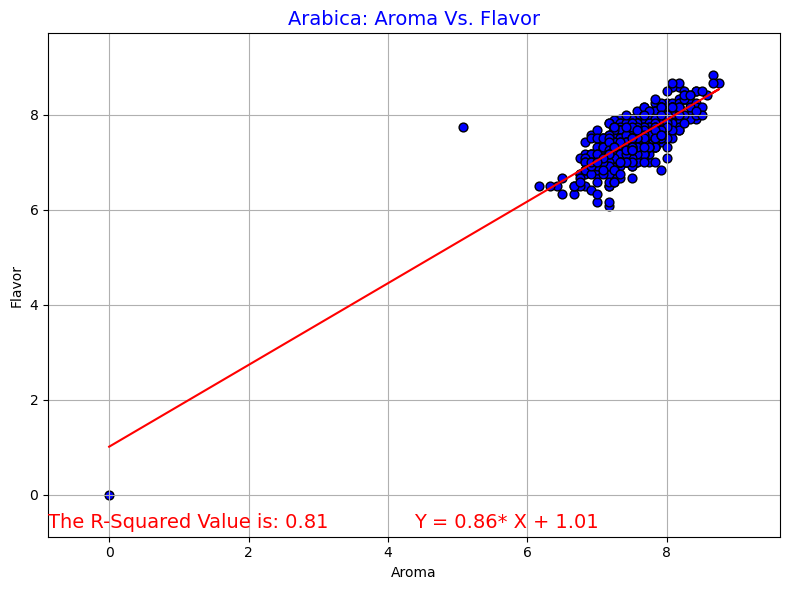

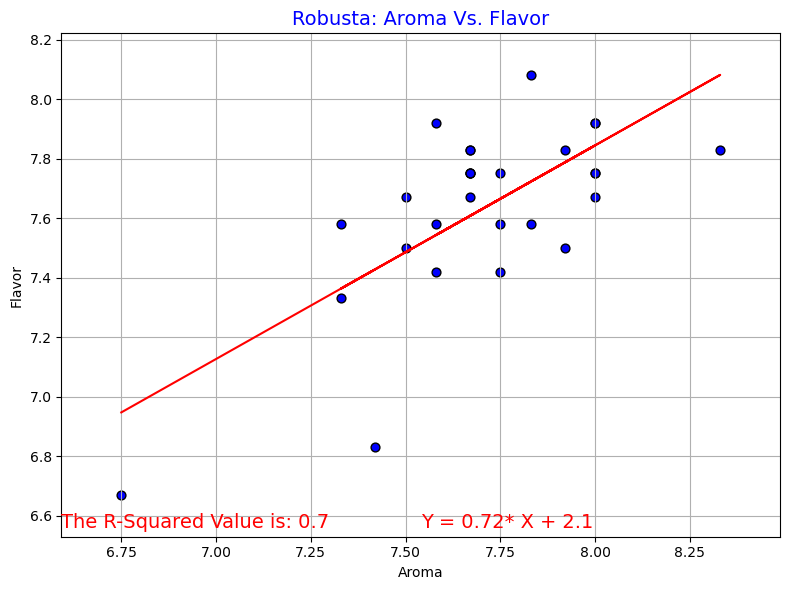

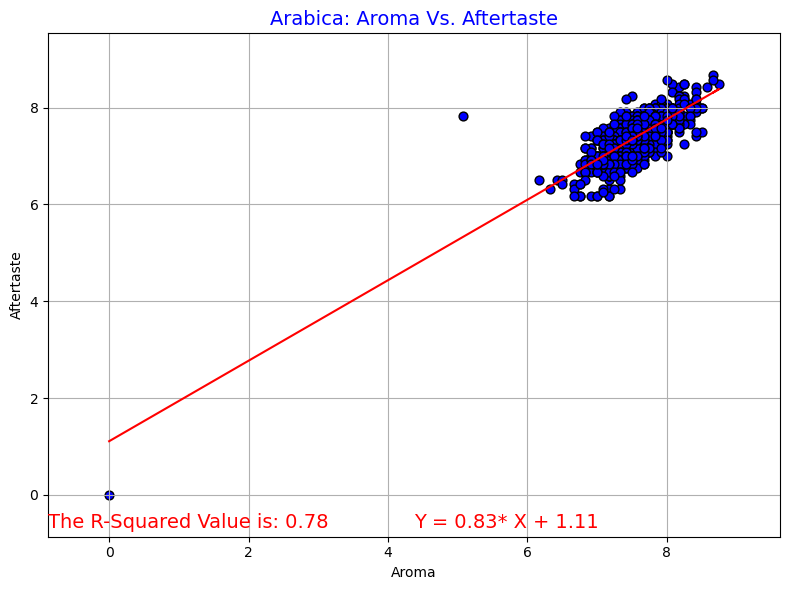

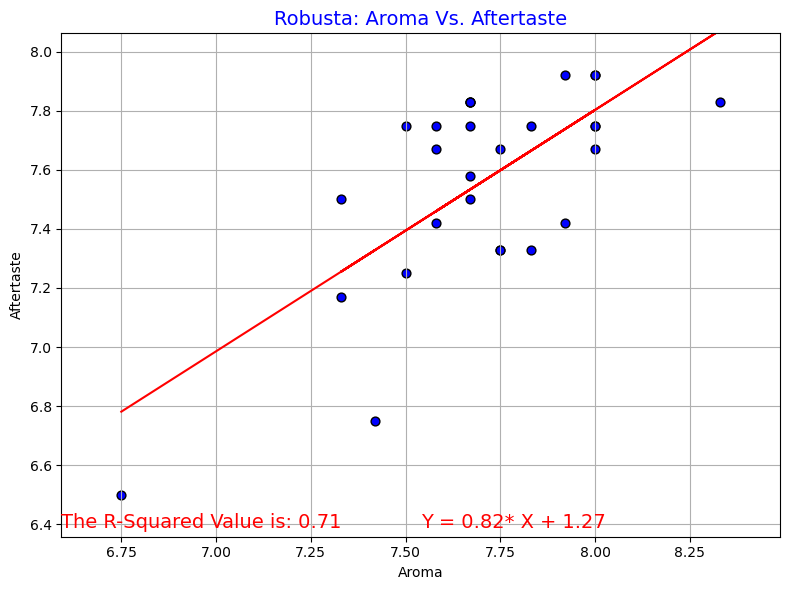

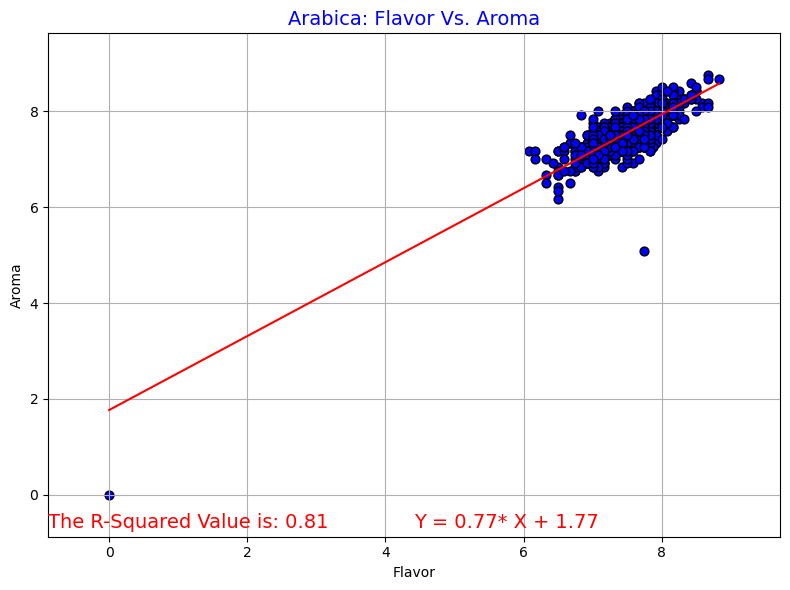

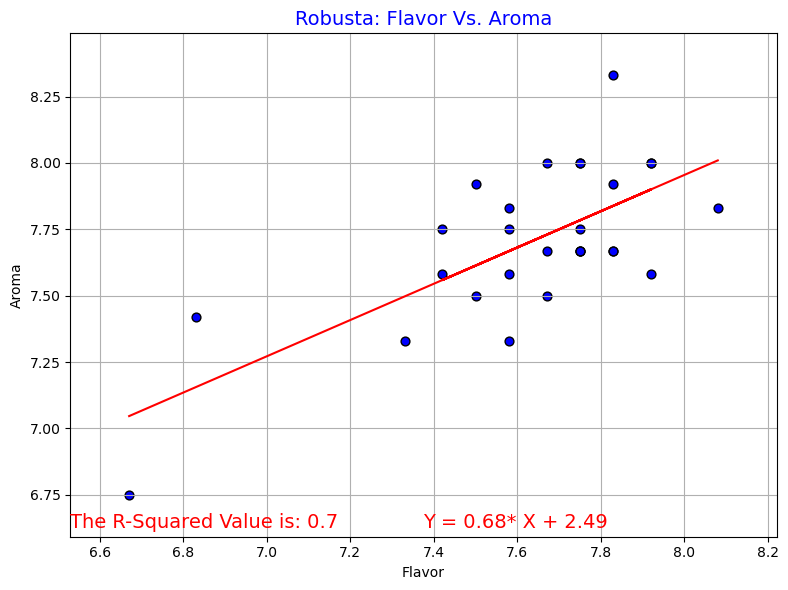

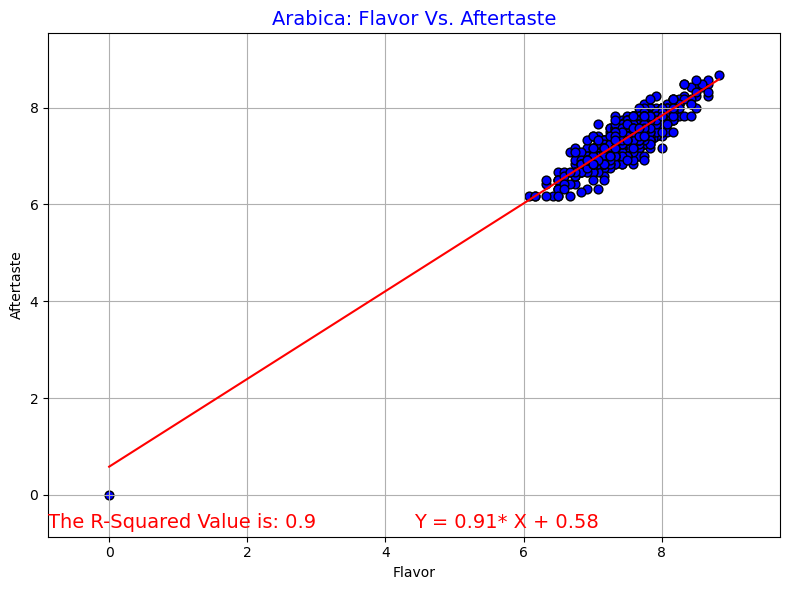

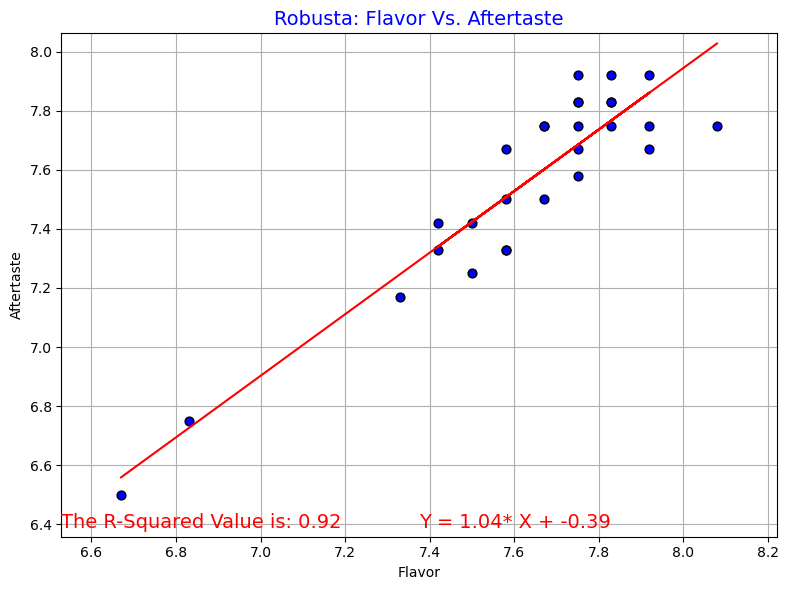

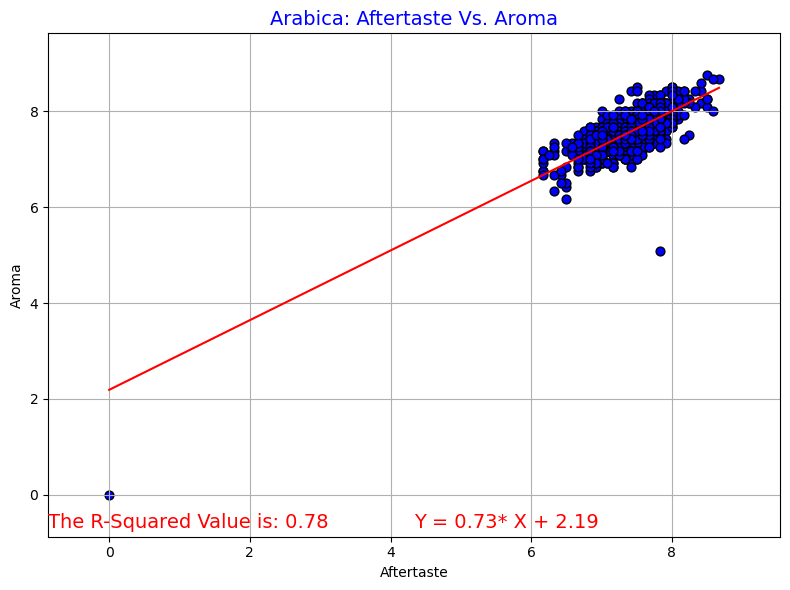

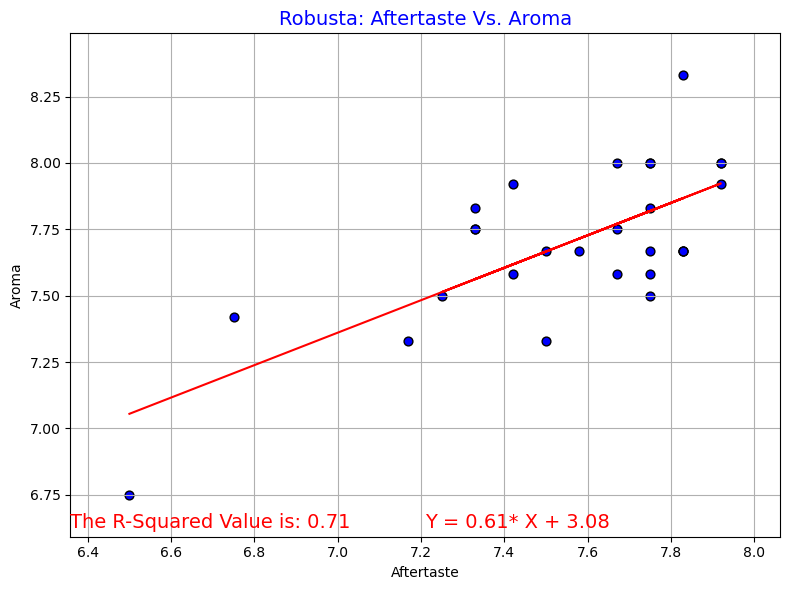

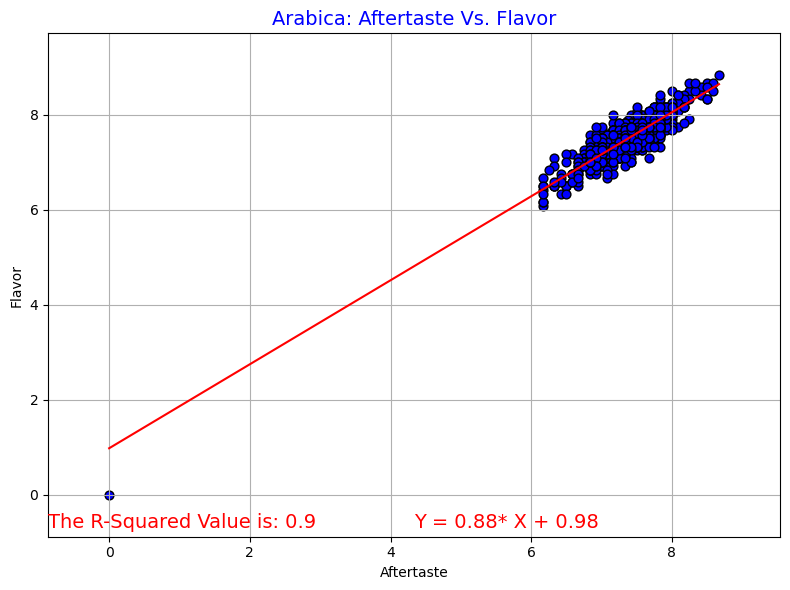

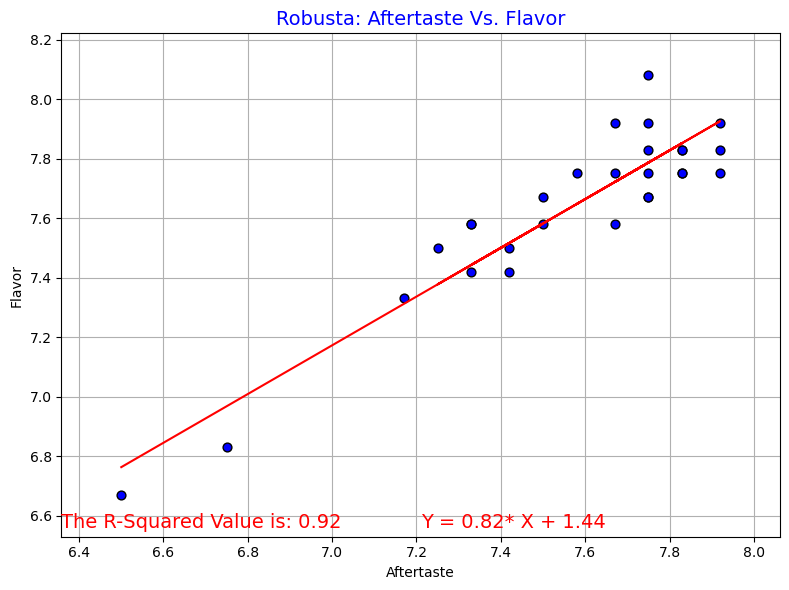

In [19]:
# Define a function to create Linear Regression plots
def plot_scatters(Dataframe,X_Column_List,Y_Column_List,Categories):

    for j,X_Column in enumerate(X_Column_List): 
        
        for i,Y_Column in enumerate(Y_Column_List):

            for h,hem in enumerate(Categories):
                        
                        if X_Column== Y_Column:
                            continue

                        plot_df =  Dataframe.loc[Dataframe["Species"]== hem,[X_Column,Y_Column]].reset_index(drop=True)
                        plot_df.plot(kind="scatter",x=X_Column,y=Y_Column,s=40,marker ="o",color="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                        xlabel = f"{X_Column}", ylabel = f"{Y_Column}") 
                        font = {'color':  'blue','fontweight': '3','fontsize': 14}    


                        plt.title(f"{hem}: {X_Column} Vs. {Y_Column}",fontdict=font)  

                        xaxis = plot_df[X_Column]
                        yaxis =  plot_df[Y_Column]

                        xmin = xaxis.min()- 0.1 * (xaxis.max()-xaxis.min())
                        xmax= xaxis.max()+ 0.1 * (xaxis.max()-xaxis.min())
                        ymin=yaxis.min()- 0.1 * (yaxis.max()-yaxis.min())
                        ymax=yaxis.max()+ 0.1 * (yaxis.max()-yaxis.min())
                        plt.xlim(xmin,xmax)
                        plt.ylim(ymin,ymax)

                        (slope, intercept, r, p, std_e) = stats.linregress(xaxis,yaxis)
                        regress_line = (slope * xaxis) + intercept
                        regress_eq = "Y = " + str(round(slope,2))+ "* X + " + str(round(intercept,2))

                        plt.plot(xaxis,regress_line,color = "r")
                        plt.annotate(regress_eq,xy=(xmin+((xmax - xmin)/2),yaxis.min()- 0.08 * (yaxis.max()-yaxis.min())),color="r",fontsize=14)
                        plt.annotate(f"The R-Squared Value is: {round(r,2)}",xy=(xmin,yaxis.min()- 0.08 * (yaxis.max()-yaxis.min())),color="r",fontsize=14)
                        plt.tight_layout()
                        
                        plt.savefig(f"data/Regression/{hem}:{X_Column}-{Y_Column}.png")

                
species = ["Arabica", "Robusta"]
y_col_list = ['Aroma', 'Flavor', 'Aftertaste']
              # 'Acidity', 'Body','Balance', 'Uniformity', 'Clean.Cup', 'Sweetness','Moisture'\
              # , 'Category.One.Defects',  'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']
x_col_list = ['Aroma', 'Flavor', 'Aftertaste'] 
              # 'Acidity', 'Body','Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture'\
              # , 'Category.One.Defects', 'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']

plot_scatters(coffee_df,x_col_list,y_col_list,species)        

<div class="alert alert-block alert-info">
SNEHA -- END -- GENERAL EDA -- REGRESSION by SPECIES/ANY FUNCTION
</div>